In [1]:
import scipy.io as sio
import numpy as np
import pickle
from rdkit import Chem
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
struct = sio.loadmat('odormappingdata_simple_05_2022.mat')

In [3]:
for k in struct.keys():
    if not k.startswith("_"):
        print(k)

allconcs_prep
allrespmats
odornameslist
respmatrix_omp111L_dF
respmatrix_omp111R_dF
respmatrix_omp112L_dF
respmatrix_omp112R_dF
respmatrix_omp113L_dF
respmatrix_omp113R_dF
respmatrix_omp114L_dF
respmatrix_omp114R_dF


## load concentrations
from the description:

 'allconcs_prep': Calculated final delivered concentration of each odorant, indexed in the same order as response matrices and odornames list, for each mouse, in mols/L. Note that concentrations estimated from vapor pressure, calibrated air dilution, and liquid dilution, assuming ideal behavior. 

In [4]:
allconcs_prep = struct['allconcs_prep']

In [5]:
allconcs_prep.shape

(185, 4)

## load response matrices
From the description: 

'allrespmatrices_dF': Structure array consists of odorant response matrices and ROI positions for each OB. 
Variables are indexed in the following order: 
 1. omp111L, 
 2. omp111R, 
 3. omp112L, 
 4. omp112R, 
 5. omp113L, 
 6. omp113R, 
 7. omp114L, 
 8. omp114R. 
 
All odorants are in the same order for all response matrices (see ‘odornameslist’ variable). 

ROI positions indicate centroid of each ROI, after visual registration by aligning the midline and caudal sinus. Units are microns, reference (zero) is midline (for ‘Xpos’) and caudal sinus (for ‘Ypos’). Note that the Xposition for ROIs from the left OB is negative relative to midline.


the fields in each of the struct elements are:
1. respmat
2. lsparseness
3. numeffodorsperglom
4. roidynrange
5. normrespmat
6. dim
7. xnormrespmat
8. maxgloms
9. psparseness
10. numrespglomsperodor
11. rho_corrx
12. ROIPos
13. ROImaxresp

Note that `ROIPos` are stored as a matlab table which `scipy.io.loadmat` cannot load. Therefore, these are provided in separate files here, see below. 


In [6]:
allrespmats = struct['allrespmats']

In [7]:
allresprows = sum([allrespmats[0,i][0].shape[0] for i in range(allrespmats.shape[1])])
allresprows

1004

In [8]:
ranges = np.zeros((allrespmats.shape[1],2),dtype=int)
allresp = np.zeros((allresprows,187))
allrespnorm = np.zeros_like(allresp)

In [9]:
y = 0
for i in range(allrespmats.shape[1]):
    assert allrespmats[0,i][0].shape == allrespmats[0,i][4].shape
    ysize = allrespmats[0,i][0].shape[0]
    allresp[y:y+ysize,:] = allrespmats[0,i][0]
    allrespnorm[y:y+ysize,:] = allrespmats[0,i][4]
    ranges[i,:] = [y,y+ysize]
    y += ysize

Finally, we should add a list of names of mice so we can tell them apart later. 

In [10]:
mousenames = [
    "omp111L",
    "omp111R",
    "omp112L",
    "omp112R",
    "omp113L",
    "omp113R",
    "omp114L",
    "omp114R"
]

### load ROIPos

In [11]:
roiposmat = sio.loadmat('roipos.mat')
roipos = np.zeros((allresprows,2))
for i in range(8):
    roipos_i = roiposmat['ROIPos{:d}'.format(i)]
    roiposrows_i = roipos_i.shape[0]
    allresprows_i = allrespmats[0,i][0].shape[0]
    assert roiposrows_i == allresprows_i
    roipos[ranges[i,0]:ranges[i,1],:] = roipos_i


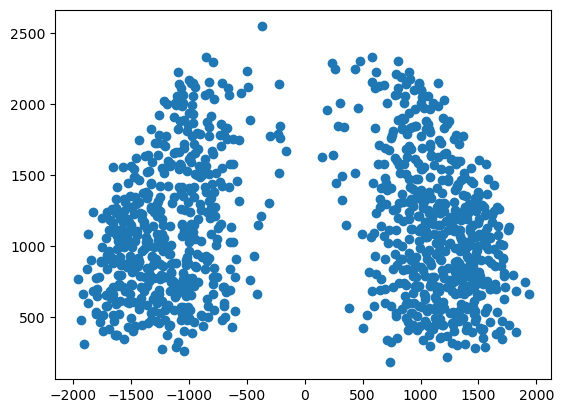

In [12]:
plt.scatter(roipos[:,0],roipos[:,1])

## odor names

In [13]:
odornameslist = [on[0][0] for on in struct['odornameslist']]

In [14]:
odornameslist

['C7 propionic acid',
 'C1 butyric acid',
 'C2 2-methylbutyric acid',
 'C3 valeric acid',
 'C6 isovaleric acid',
 'C9 2-methyl-2-pentenoic acid',
 'C5 hexanoic acid',
 'C4 heptanoic acid',
 'D15 methacrolein',
 'D16 butyraldehyde',
 'D13 isobutyraldehyde',
 'D1 2-methylbutyraldehyde',
 'D2 trans-2-methyl-2-butenal',
 'D12 methional',
 'D8 valeraldehyde',
 'D7 isovaleraldehyde',
 'D5 2-methylvaleraldehyde',
 'D14 2-methyl-2-pentenal',
 'D6 hexanal',
 'D3 heptanal',
 'D4 octanal',
 'D9 trans-2-nonenal',
 'D18 trans-2,cis-6-nonadienal',
 'D10 trans-2-dodecenal',
 'D17 2-hexyl-2-decenal',
 'E1 butyl acetate',
 'E7 S-methyl thiobutanoate',
 'E11 isoamyl acetate',
 'E8 hexyl acetate',
 'E15 3-mercaptohexyl acetate',
 'E2 ethyl butyrate',
 'E9 methyl 2-methylbutyrate',
 'E3 vinyl butyrate',
 'E4 methyl valerate',
 'E12 1-octen-3-yl butyrate',
 'E14 methyl tiglate',
 'E5 ethyl tiglate',
 'E10 isopropyl tiglate',
 'E6 hexyl tiglate',
 'E13 isobornyl isovalerate',
 'F1 furfuryl mercaptan',
 'F2 

## save for convenience

In [15]:
datadict = {
    'allresp': allresp,
    'allrespnorm': allrespnorm,
    'roipos': roipos, 
    'ranges': ranges,
    'mousenames': mousenames,
    'odornameslist': 'odornameslist'
}
with open('elife22data_python.pkl','wb') as f:
    pickle.dump(datadict, f)